# 1. Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

![Lead Conversion Process - Demonstrated as a funnel](https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg)

there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.



# 2. Importing the Dataset

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 3. Exploratory Data Analysis

## 3.1. Inspecting the dataset

### 3.1.1. Looking at the Null Values

In [4]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [5]:
leads.shape

(9240, 37)

In [6]:
# Percentage of Null values

leads.isnull().sum()/9240*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Here the following columns have more than 45% null values:

Lead Quality

Asymmetrique Activity Index

Asymmetrique Profile Index

Asymmetrique Activity Score

Asymmetrique Profile Score

This are the columns we are going to drop.


In [7]:
# Dropping the Columns with High Number Missing Values

leads.drop(["Lead Quality", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"], axis = 1, inplace = True)

In [8]:
leads.isnull().sum()/9240*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

For the rest of the Null values, we are going to drop the null values only

In [9]:
leads.dropna(inplace = True)

In [10]:
leads.shape

(4534, 32)

In [11]:
leads.isnull().sum()/4534*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

### 3.1.2. Looking at datatypes of all the columns

In [12]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534 entries, 1 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    4534 non-null   object 
 1   Lead Number                                    4534 non-null   int64  
 2   Lead Origin                                    4534 non-null   object 
 3   Lead Source                                    4534 non-null   object 
 4   Do Not Email                                   4534 non-null   object 
 5   Do Not Call                                    4534 non-null   object 
 6   Converted                                      4534 non-null   int64  
 7   TotalVisits                                    4534 non-null   float64
 8   Total Time Spent on Website                    4534 non-null   int64  
 9   Page Views Per Visit                           4534 

Here Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement columns may be a int or float but the datatypes are currently object.


### 3.1.3. Inspecting All the Columns

In this section we will check the following for all the columns:
  1. Whether the columns are in the correct datatypes
  2. Whether they are a categorical variable.

In [13]:
# Lead Origin Column

leads["Lead Origin"].value_counts()

Landing Page Submission    3434
API                        1076
Lead Add Form                24
Name: Lead Origin, dtype: int64

In [14]:
# Lead Source Column

leads["Lead Source"].value_counts()

Google               1812
Direct Traffic       1775
Organic Search        793
Referral Sites         65
Olark Chat             56
Reference              21
Welingak Website        3
bing                    2
Social Media            2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Facebook                1
Press_Release           1
Name: Lead Source, dtype: int64

In [15]:
# Do Not Email Column

leads["Do Not Email"].value_counts()

No     4201
Yes     333
Name: Do Not Email, dtype: int64

In [16]:
# Do Not Call Column

leads["Do Not Call"].value_counts()

No     4533
Yes       1
Name: Do Not Call, dtype: int64

In [17]:
# Converted Column

leads["Converted"].value_counts()

0    2617
1    1917
Name: Converted, dtype: int64

In [18]:
# Last Activity Column

leads["Last Activity"].value_counts()

Email Opened                    1774
SMS Sent                        1483
Page Visited on Website          377
Converted to Lead                271
Olark Chat Conversation          170
Email Bounced                    137
Email Link Clicked               118
Form Submitted on Website         75
Unreachable                       64
Unsubscribed                      34
Had a Phone Conversation          22
Approached upfront                 3
View in browser link Clicked       2
Email Received                     2
Visited Booth in Tradeshow         1
Email Marked Spam                  1
Name: Last Activity, dtype: int64

In [19]:
# Search

leads["Search"].value_counts()

No     4524
Yes      10
Name: Search, dtype: int64

In [20]:
# Receive More Updates About Our Courses Column

leads["Receive More Updates About Our Courses"].value_counts()

No    4534
Name: Receive More Updates About Our Courses, dtype: int64

In [21]:
# Tags Column

leads["Tags"].value_counts()

Will revert after reading the email                  1534
Ringing                                              1053
Interested in other courses                           372
Already a student                                     343
switched off                                          223
Busy                                                  174
Closed by Horizzon                                    172
Not doing further education                           131
Interested  in full time MBA                           98
Graduation in progress                                 92
Lost to EINS                                           89
invalid number                                         75
Diploma holder (Not Eligible)                          48
wrong number given                                     43
opp hangup                                             30
number not provided                                    23
in touch with EINS                                      9
In confusion w

In [22]:
# Update me on Supply Chain Content Column

leads["Update me on Supply Chain Content"].value_counts()

No    4534
Name: Update me on Supply Chain Content, dtype: int64

In [23]:
# Lead Profile Column

leads["Lead Profile"].value_counts()

Select                         2836
Potential Lead                 1092
Other Leads                     406
Student of SomeSchool           171
Dual Specialization Student      17
Lateral Student                  12
Name: Lead Profile, dtype: int64

In [24]:
# Last Notable Activity

leads["Last Notable Activity"].value_counts()

Email Opened                    1481
Modified                        1412
SMS Sent                        1263
Page Visited on Website          179
Email Link Clicked                74
Email Bounced                     32
Olark Chat Conversation           32
Unsubscribed                      26
Unreachable                       18
Had a Phone Conversation          13
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

On basis of the above alalysis, all the columns are in the correct datatypes. We can devide the columns in the following category:

In [25]:
cat_var = ["Lead Origin", "Lead Source", "Last Activity", "Country", "Specialization", "How did you hear about X Education", "What is your current occupation", "What matters most to you in choosing a course", "Tags", "Lead Profile", "City", "Last Notable Activity"]

y_n_var = ["Do Not Email", "Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]

num_var = ["TotalVisits", "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

## 3.2. Analysis

### 3.2.1. Data Imbalence Check

In [26]:
# Imbalence Check

leads.Converted.value_counts(normalize = True)

0    0.577195
1    0.422805
Name: Converted, dtype: float64

<Axes: >

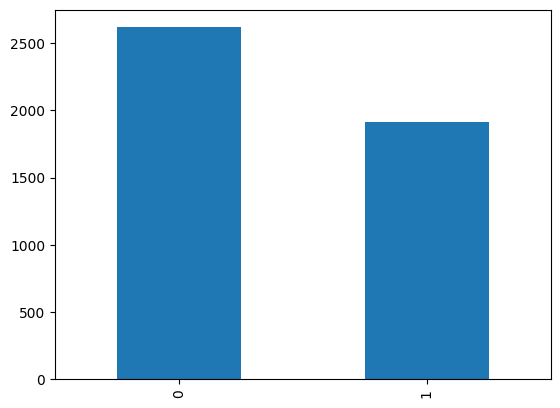

In [27]:
leads.Converted.value_counts().plot.bar()

In [28]:
# Checking the Convert rate

convert = (sum(leads["Converted"])/len(leads["Converted"].index))*100

convert

42.28054697838553

From the analysis, we see that 42.3% leads are converted.

#### 3.2.2. Analysis

##### 3.2.2.1. Univariate Analysis

In [29]:
leads["Do Not Email"].value_counts(normalize = True)*100

No     92.655492
Yes     7.344508
Name: Do Not Email, dtype: float64

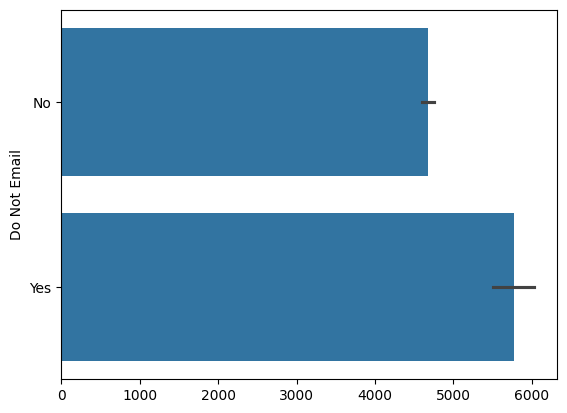

In [30]:
sns.barplot(leads["Do Not Email"])
plt.show()

In [31]:
leads["Do Not Call"].value_counts(normalize = True)*100

No     99.977944
Yes     0.022056
Name: Do Not Call, dtype: float64

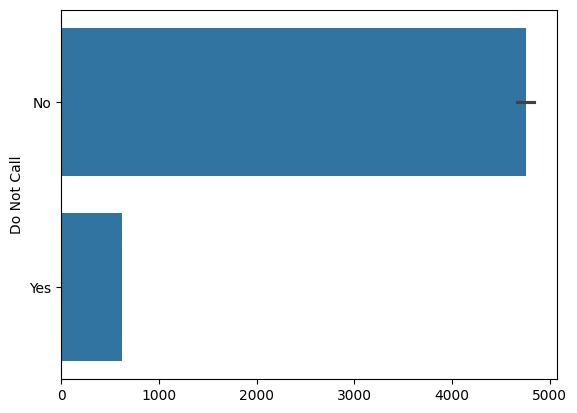

In [32]:
sns.barplot(leads["Do Not Call"])
plt.show()

**Inference 1:** 7.34% of all the leads prefer to get an email, but 99.97% of all the leads do not want to get a call. We can understand that in general people do not prefer call, but want an email about the course instead.

In [33]:
leads["Converted"].value_counts(normalize = True)

0    0.577195
1    0.422805
Name: Converted, dtype: float64

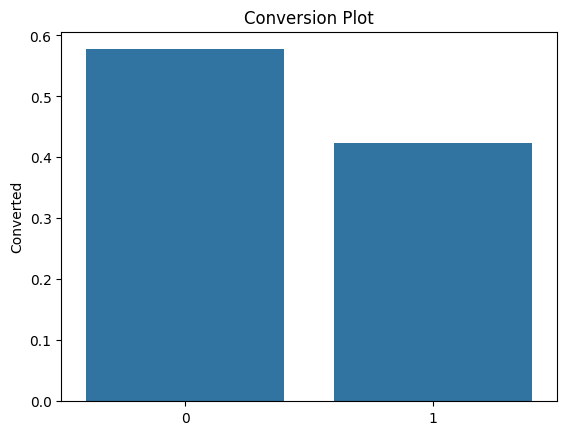

In [34]:
sns.barplot(leads["Converted"].value_counts(normalize = True))
plt.title("Conversion Plot")
plt.show()

**Inference 2:** Here we see that about 57% of the leads are not converted.

In [35]:
leads["Lead Source"].value_counts(normalize = True)*100

Google               39.964711
Direct Traffic       39.148655
Organic Search       17.490075
Referral Sites        1.433613
Olark Chat            1.235112
Reference             0.463167
Welingak Website      0.066167
bing                  0.044111
Social Media          0.044111
Pay per Click Ads     0.022056
WeLearn               0.022056
testone               0.022056
Facebook              0.022056
Press_Release         0.022056
Name: Lead Source, dtype: float64

<Axes: >

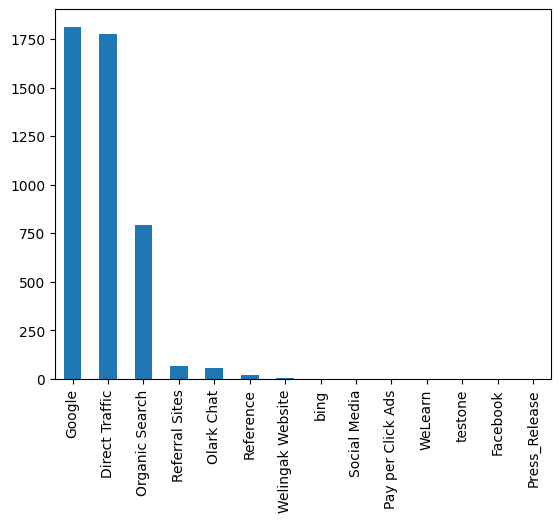

In [36]:
leads["Lead Source"].value_counts().plot.bar()

**Inference 3:** Most of the leads come from Google, Direct Traffic and Organic Search. X Education should put more emphasis on the mentioned sources whil trying to increase the number of lists coming from Ads, Social Media and Press Release.

In [37]:
leads["Country"].value_counts(normalize = True)

India                   0.958094
United States           0.009043
United Arab Emirates    0.008381
Singapore               0.003529
Saudi Arabia            0.003529
United Kingdom          0.002426
Qatar                   0.001764
Australia               0.001764
Hong Kong               0.001323
Oman                    0.001103
Bahrain                 0.001103
France                  0.001103
South Africa            0.000662
Nigeria                 0.000662
Kuwait                  0.000662
Netherlands             0.000441
Canada                  0.000441
Germany                 0.000441
Uganda                  0.000441
Philippines             0.000441
Italy                   0.000221
Indonesia               0.000221
Vietnam                 0.000221
China                   0.000221
Denmark                 0.000221
Sweden                  0.000221
Malaysia                0.000221
Tanzania                0.000221
Kenya                   0.000221
Sri Lanka               0.000221
Ghana     

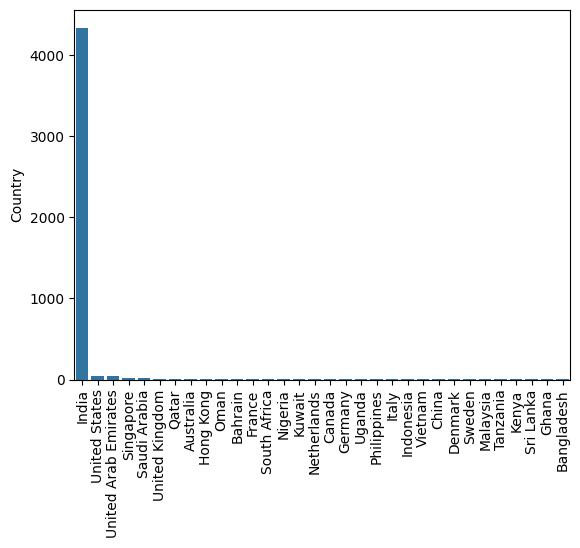

In [38]:
sns.barplot(leads["Country"].value_counts())
plt.xticks(rotation = 90)
plt.show()

**Inderence 4:** 95% of the leads come from India.

In [39]:
leads["Specialization"].value_counts(normalize = True)

Select                               0.157918
Finance Management                   0.138068
Human Resource Management            0.120423
Marketing Management                 0.116012
Operations Management                0.072563
Business Administration              0.058447
IT Projects Management               0.053816
Supply Chain Management              0.052713
Banking, Investment And Insurance    0.048963
Media and Advertising                0.031981
Travel and Tourism                   0.030216
International Business               0.026908
Healthcare Management                0.021614
Hospitality Management               0.016101
Retail Management                    0.015439
E-COMMERCE                           0.015218
Rural and Agribusiness               0.011028
E-Business                           0.008161
Services Excellence                  0.004411
Name: Specialization, dtype: float64

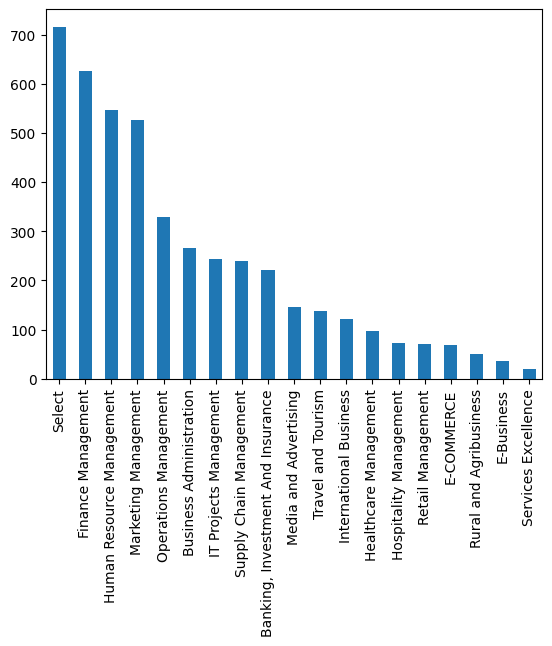

In [40]:
leads["Specialization"].value_counts().plot.bar()
plt.xticks(rotation = 90)
plt.show()

**Inference 5:** Here the selected specialization seems distributed between
Finance Management, Human Resource Management, Marketing Management, Operations Management, Business Administration, IT Projects Management, Supply Chain Management, Banking, Investment And Insurance, Media and Advertising. However it lookes like almost 15% people did not selet any specialization.

In [41]:
leads["How did you hear about X Education"].value_counts()

Select                   3141
Online Search             567
Word Of Mouth             233
Student of SomeSchool     225
Other                     132
Multiple Sources          106
Social Media               50
Advertisements             47
Email                      21
SMS                        12
Name: How did you hear about X Education, dtype: int64

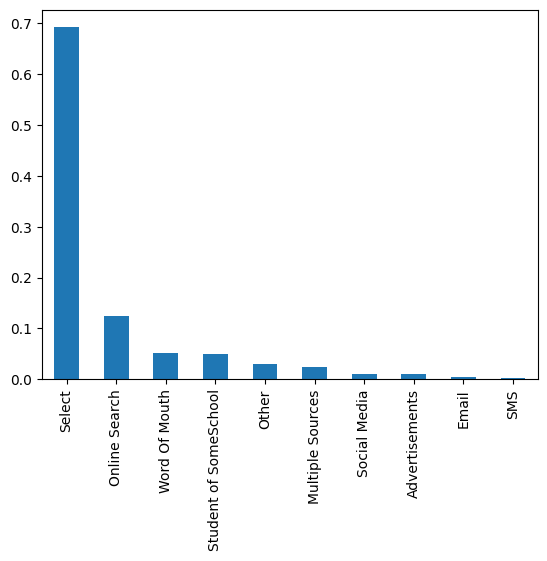

In [42]:
leads["How did you hear about X Education"].value_counts(normalize = True).plot.bar()
plt.show()

**Inference 6:** In case of the column "How did you hear about X Education" as well we see that most leads have not selected a valid option.

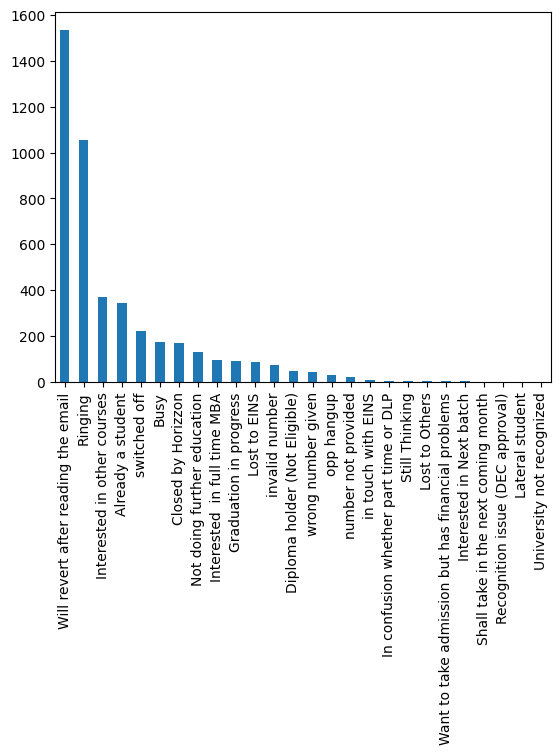

In [43]:
leads["Tags"].value_counts().plot.bar()
plt.show()

In [44]:
leads.City.value_counts(normalize = True)

Mumbai                         0.475518
Select                         0.183723
Thane & Outskirts              0.108513
Other Cities                   0.098147
Other Cities of Maharashtra    0.064843
Other Metro Cities             0.057786
Tier II Cities                 0.011469
Name: City, dtype: float64

**Inference:** Here Select is as good as Null value as it is clear that 18% leads have not selected any option.

##### 3.2.2.2. Bivariate Amalysis

<Axes: xlabel='Total Time Spent on Website', ylabel='Converted'>

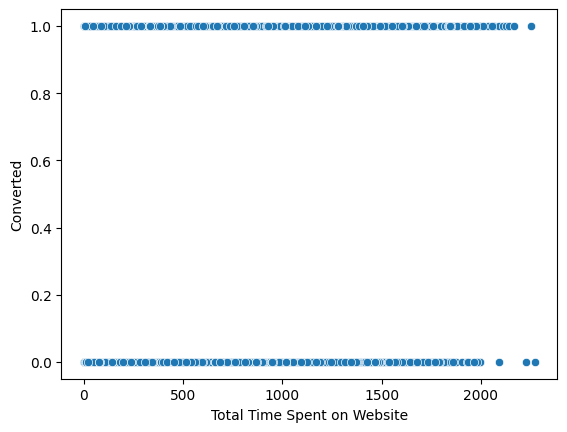

In [45]:
sns.scatterplot(data = leads, x = "Total Time Spent on Website", y = "Converted")

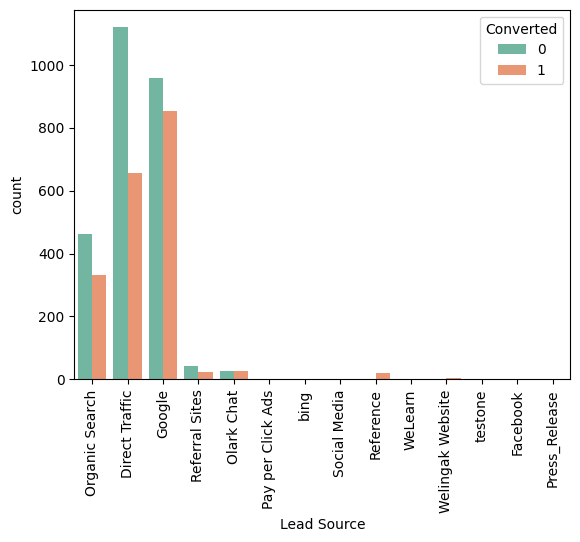

In [46]:
sns.countplot(x= 'Lead Source', hue='Converted' , data =leads , palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

**Inference:** Most leads come from Organic Search, Direct Traffic and Google. It is also important to notice that Reference has a very high conversion rate.

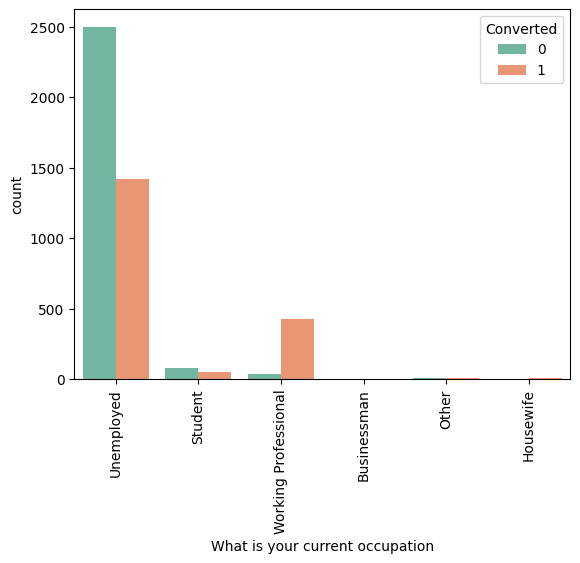

In [47]:
sns.countplot(x='What is your current occupation', hue='Converted' , data = leads , palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

**Inference:** From the above plot, we can see that most leads are Unemployed. However Working Professionals have the highest conversion rate.

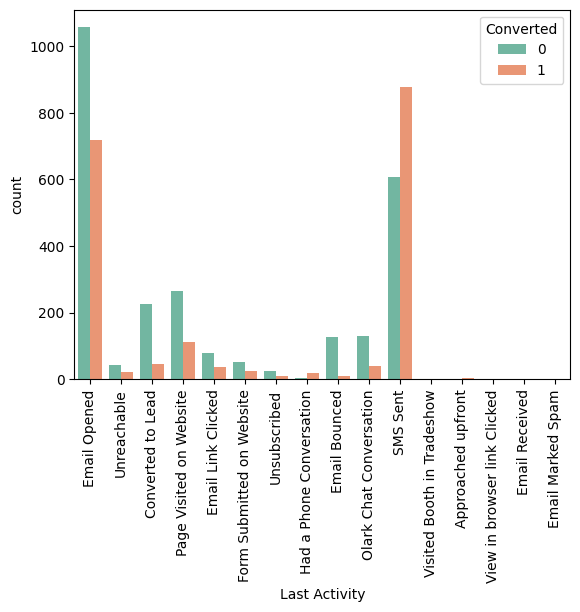

In [48]:
sns.countplot(x='Last Activity', hue='Converted' , data = leads , palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

**Inference:** It should be noted that "SMS Sent" has the most lead conversion rate.

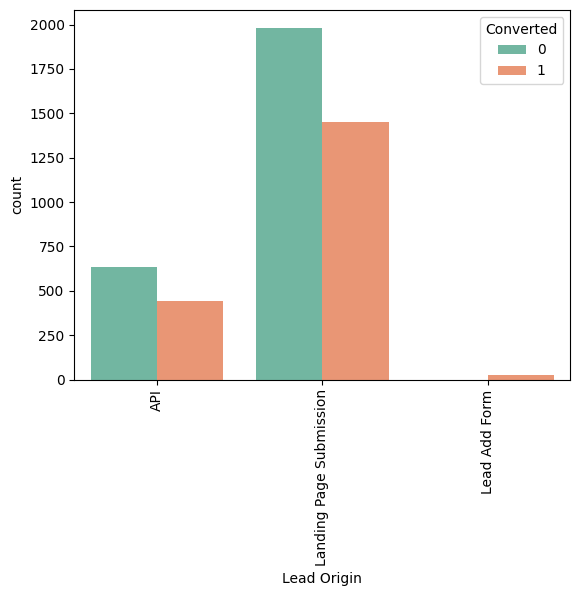

In [49]:
sns.countplot(x='Lead Origin', hue='Converted' , data = leads , palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

**Inference:** Most leads come from Landing Page Submission. But Lead Add Form has more lead conversion rate than any other category.

##### 3.2.2.3. Multivariate Analysis

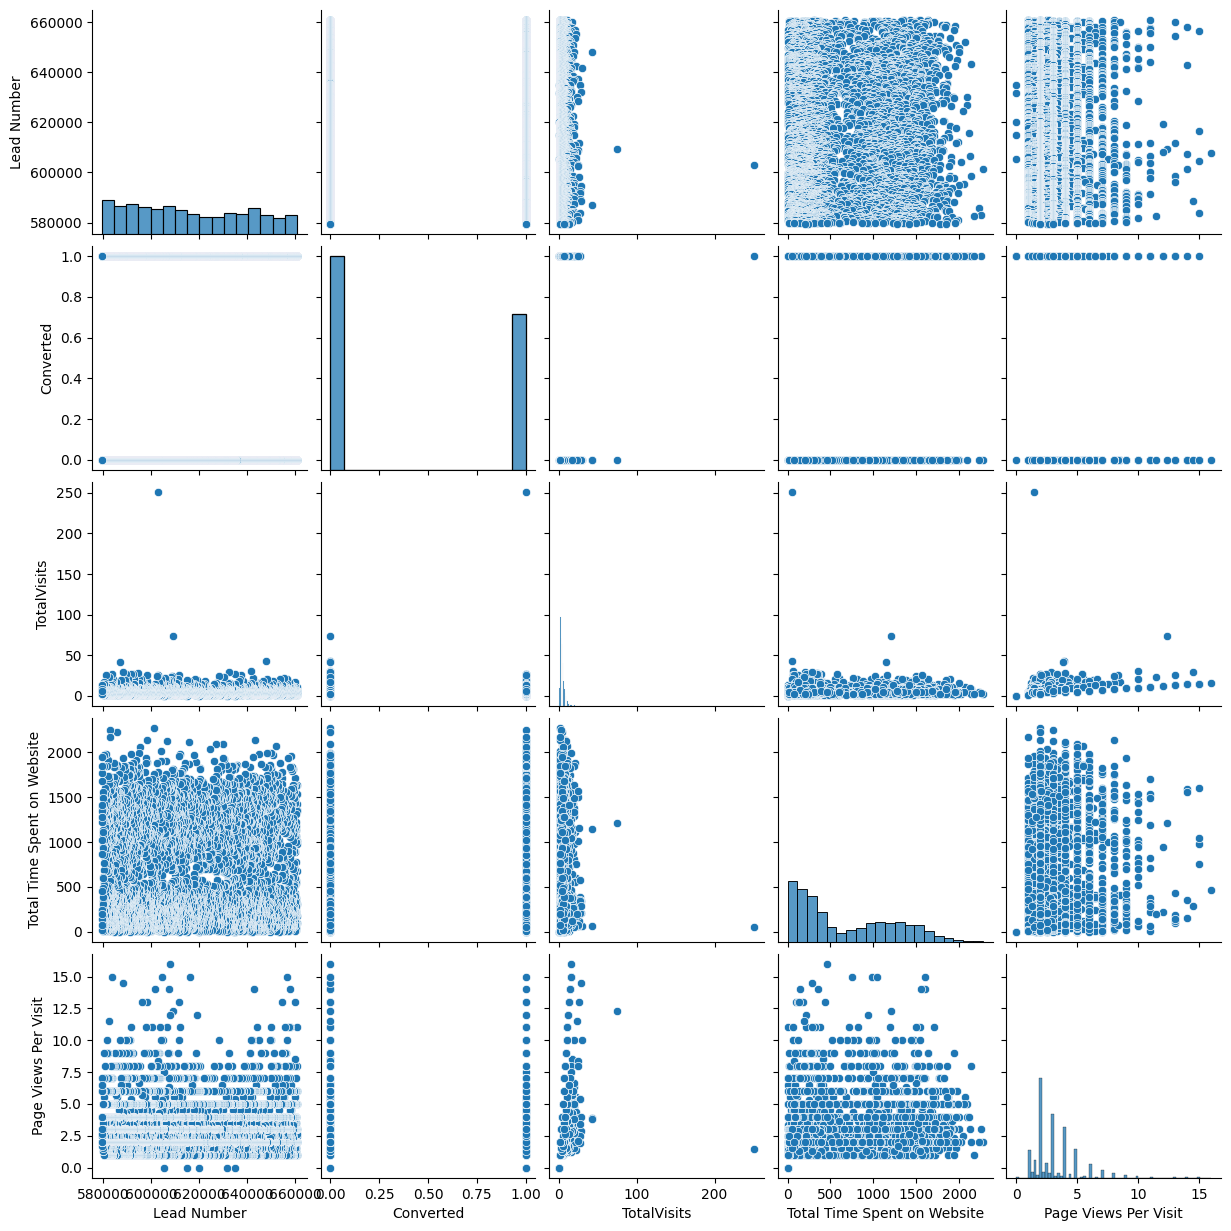

In [50]:
sns.pairplot(leads)

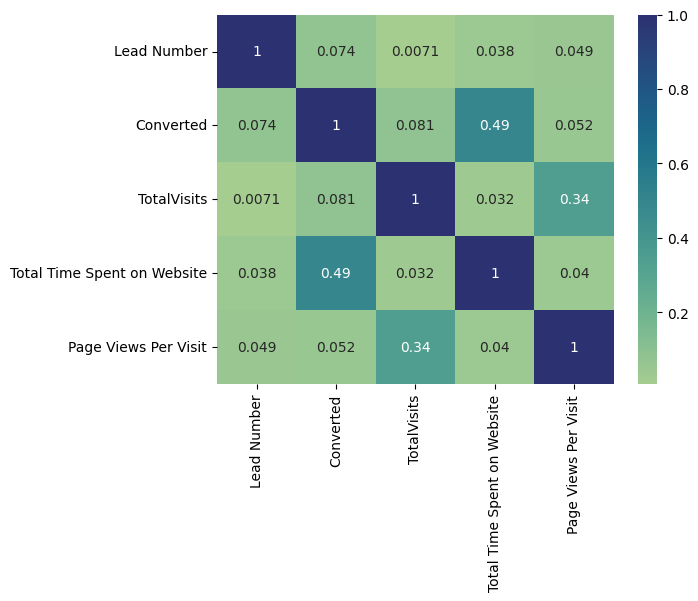

In [51]:
sns.heatmap(leads.corr(), annot = True, cmap = "crest")
plt.show()

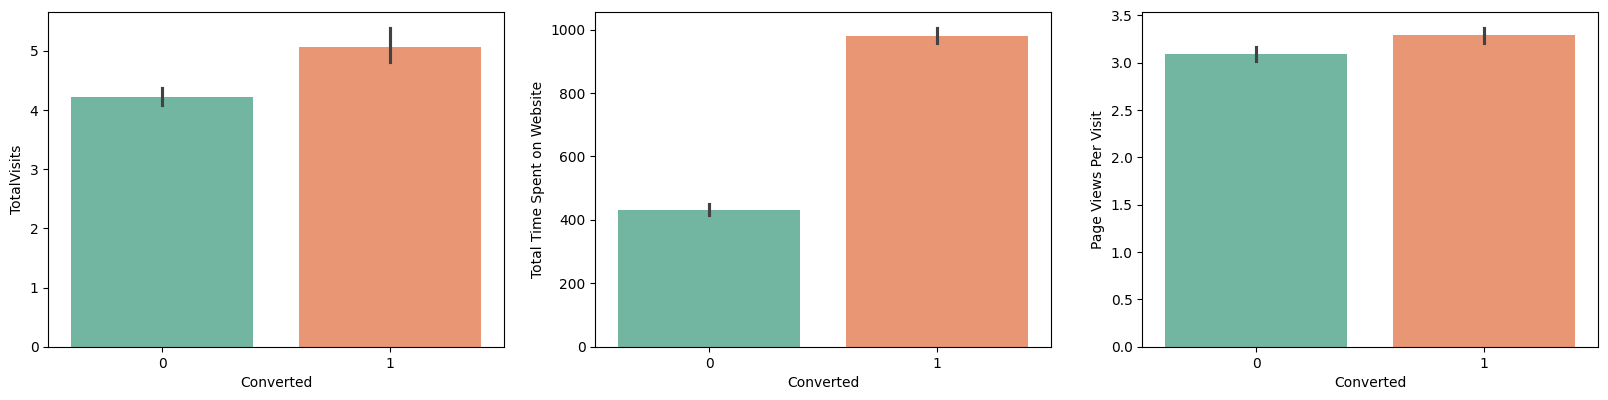

In [52]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

**Inference:** The conversion rate is high for higher Total Visits, Total Time Spent on Website and Page Views Per Visit

# 4. Preparing the Data for Model Building

## 4.1. Converting the Binary Variables (Yes/No) to 1/0

In [53]:
# List of Variables to Map

y_n_var = ["Do Not Email", "Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]

In [54]:
# Defining the Map Function

def binary_map(x):
  return x.map({"Yes": 1, "No": 0})

In [55]:
#Applying the Funtion to Leads Dataset

leads[y_n_var] = leads[y_n_var].apply(binary_map)

In [56]:
leads[y_n_var].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4.2. Creating Dummy Features for Categorical Variables with Multiple Levels

In [57]:
dummy1 = pd.get_dummies(leads[cat_var], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# Adding the Results to Original Dataset

leads = pd.concat([leads, dummy1], axis = 1)

In [59]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Dropping the Categorical Variable

leads = leads.drop(leads[cat_var], axis = 1)

In [61]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,0,0,1,2.0,1640,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Magazine',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=163)

# 5. Test Train Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting Feature Variable to X

X = leads.drop(["Prospect ID" , "Lead Number", "Converted"], axis = 1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,2.0,1640,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
# Putting the Converted columns in Y

Y = leads["Converted"]

Y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [66]:
# Splitting the Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

# 6. Feature Scalling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5066,0,0,0.420635,-0.800824,2.092908,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7578,0,0,0.244347,-0.954251,-0.096937,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7921,0,0,-0.284516,-0.344153,-0.096937,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9155,0,0,-0.108228,1.022251,-1.011197,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
542,1,0,-0.108228,-0.578806,0.450524,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
# Checking the Convert rate

convert = (sum(leads["Converted"])/len(leads["Converted"].index))*100

convert

42.28054697838553

# 7. Model Building

## 7.1. Building the First Model

In [70]:
# Importing Libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
import statsmodels.api as sm

In [72]:
# Logistic Regression Model

X_train_sm = sm.add_constant(X_train)

logml = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())

res = logml.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3173
Model:                            GLM   Df Residuals:                     3033
Model Family:                Binomial   Df Model:                          139
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 20 Feb 2024   Deviance:                       15658.
Time:                        13:31:55   Pearson chi2:                 7.66e+17
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [73]:
# Predicting with the model

Y_train_pred = res.predict(X_train_sm)

In [74]:
Y_train_pred[:10]

5066    0.0
7578    0.0
7921    0.0
9155    1.0
542     0.0
3002    0.0
789     1.0
5029    0.0
686     1.0
8536    1.0
dtype: float64

In [75]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1.])

In [76]:
Y_train_pred_final =  pd.DataFrame({"Converted": Y_train.values, "Convert_Prob": Y_train_pred})
Y_train_pred_final["LeadID"] = Y_train.index
Y_train_pred_final.head()

,Converted,Convert_Prob,LeadID
0,0,0.0,5066
1,0,0.0,7578
2,0,0.0,7921
3,1,1.0,9155
4,0,0.0,542


In [77]:
Y_train_pred_final["predicted"] = Y_train_pred_final.Convert_Prob.map(lambda x: 1 if x >0.5 else 0)

In [78]:
Y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,0,0.0,5066,0
1,0,0.0,7578,0
2,0,0.0,7921,0
3,1,1.0,9155,1
4,0,0.0,542,0


In [79]:
from sklearn import metrics

In [80]:
# Confusion Matrix

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

confusion

array([[1756,   84],
       [  86, 1247]])

**Confusion Matrix**

Actual\Predictd | No (No Churn) | Yes (Churn)
----------------|---------------|------------
No (No Churn)   |    1785       |    55
Yes (Churn)     |    67         |    1266

In [81]:
def logistic_reg_metrics(confusion):    #confusion - numpy array
  TP = confusion[1, 1]    # True Positive
  TN = confusion[0, 0]    # True Negative
  FP = confusion[0, 1]    # False Positive
  FN = confusion[1, 0]    # False Negative

  Accuracy = float(TP + TN)/float(TP + TN +FP +FN)
  Sensitivity = (TP/float(TP + FN))
  Specificity = (TN/float(TN + FP))

  FalsePositiveRate = (FP/float(TN + FP))
  FalseNegativeRate = FN/float(FN + TP)

  Precision = TP / float(TP+FP)
  Recall = TP / float(TP+ FN)
  F1Score = 2 * ((TP / float(TP+FP)) * (TP / float(TP+ FN)))/((TP / float(TP+FP)) + (TP / float(TP+ FN)))

  print("Accuracy = {0}".format(float(TP + TN)/float(TP + TN +FP +FN)))   # Checking Accuracy
  print("Sensitivity = {0}".format((TP/float(TP + FN))))    # Checking Sensitivity
  print("Specificity = {0}\n".format((TN/float(TN + FP))))    # Checking Specificity

  print("False Positive Rate = {0}".format((FP/float(TN + FP))))    # False Positive Rate - Predicting churn when customer does not have churned
  print("False Negative Rate = {0}".format(FN/float(FN + TP)))    # False Negative Rate
  print("Positive Predictive Value (Precision (PRE)) = {0}".format(TP / float(TP+FP)))    # Positive Predictive Value
  print("Negative Predictive Value (recall (REC)) = {0}".format(TP / float(TP+ FN)))    # Negative Predictive Value
  print("F1-Score = {0}".format(2 * ((TP / float(TP+FP)) * (TP / float(TP+ FN)))/((TP / float(TP+FP)) + (TP / float(TP+ FN)))))   # F1-Score

In [82]:
logistic_reg_metrics(confusion)

Accuracy = 0.9464229435865111
Sensitivity = 0.9354838709677419
Specificity = 0.9543478260869566

False Positive Rate = 0.04565217391304348
False Negative Rate = 0.06451612903225806
Positive Predictive Value (Precision (PRE)) = 0.9368895567242674
Negative Predictive Value (recall (REC)) = 0.9354838709677419
F1-Score = 0.9361861861861861


## 7.2. Feature Elimination

### 7.2.1. Feature Elimination Susing RFE

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
from sklearn.feature_selection import RFE

In [85]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 25)
rfe = rfe.fit(X_train, Y_train)

In [86]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False,

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 10),
 ('Do Not Call', False, 84),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 64),
 ('Search', False, 70),
 ('Magazine', False, 121),
 ('Newspaper Article', False, 66),
 ('X Education Forums', False, 118),
 ('Newspaper', False, 119),
 ('Digital Advertisement', False, 91),
 ('Through Recommendations', False, 50),
 ('Receive More Updates About Our Courses', False, 126),
 ('Update me on Supply Chain Content', False, 120),
 ('Get updates on DM Content', False, 122),
 ('I agree to pay the amount through cheque', False, 128),
 ('A free copy of Mastering The Interview', False, 117),
 ('Lead Origin_Landing Page Submission', False, 114),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Source_Facebook', False, 123),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Olark Chat', False, 45),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Pay per Click Ads', False, 115),
 ('Lead Source_Press_Release

In [88]:
# Looking at the Selected Columns

X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Country_Germany', 'Country_Hong Kong',
       'How did you hear about X Education_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [89]:
col = X_train.columns[rfe.support_]

### 7.2.2. Building Model with selected features

In [90]:
import statsmodels.api as sm

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [92]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3173
Model:                            GLM   Df Residuals:                     3147
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -374.47
Date:                Tue, 20 Feb 2024   Deviance:                       748.94
Time:                        13:32:04   Pearson chi2:                 3.29e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6752
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [93]:
# Predicting with the model

Y_train_pred = res.predict(X_train_sm)

In [94]:
Y_train_pred[:10]

5066    0.011249
7578    0.016844
7921    0.017375
9155    0.987064
542     0.001138
3002    0.017848
789     0.997415
5029    0.013268
686     0.953034
8536    0.929570
dtype: float64

In [95]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.01124879, 0.01684443, 0.01737489, 0.98706353, 0.0011379 ,
       0.01784772, 0.99741504, 0.01326823, 0.95303445, 0.92956976])

### 7.2.3. Creating a Dataset with an Actual Convert Flag and Predicted Probabilities

In [96]:
Y_train_pred_final =  pd.DataFrame({"Converted": Y_train.values, "Convert_Prob": Y_train_pred})
Y_train_pred_final["LeadID"] = Y_train.index
Y_train_pred_final.head()

,Converted,Convert_Prob,LeadID
0,0,0.011249,5066
1,0,0.016844,7578
2,0,0.017375,7921
3,1,0.987064,9155
4,0,0.001138,542


### 7.2.4. Creating a Column "Predicted" with 1 if Convert_Prob > 0.5

In [97]:
Y_train_pred_final["predicted"] = Y_train_pred_final.Convert_Prob.map(lambda x: 1 if x >0.5 else 0)

In [98]:
Y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted
0,0,0.011249,5066,0
1,0,0.016844,7578,0
2,0,0.017375,7921,0
3,1,0.987064,9155,1
4,0,0.001138,542,0


### 7.2.5. Calculating Accuracy, Precision and Recall

In [99]:
from sklearn import metrics

In [100]:
# Confusion Matrix

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

confusion

array([[1785,   55],
       [  67, 1266]])

**Confusion Matrix**

Actual\Predictd | No (No Churn) | Yes (Churn)
----------------|---------------|------------
No (No Churn)   |    1786       |    54
Yes (Churn)     |    70         |    1263

In [101]:
def logistic_reg_metrics(confusion):    #confusion - numpy array
  TP = confusion[1, 1]    # True Positive
  TN = confusion[0, 0]    # True Negative
  FP = confusion[0, 1]    # False Positive
  FN = confusion[1, 0]    # False Negative

  Accuracy = float(TP + TN)/float(TP + TN +FP +FN)
  Sensitivity = (TP/float(TP + FN))
  Specificity = (TN/float(TN + FP))

  FalsePositiveRate = (FP/float(TN + FP))
  FalseNegativeRate = FN/float(FN + TP)

  Precision = TP / float(TP+FP)
  Recall = TP / float(TP+ FN)
  F1Score = 2 * ((TP / float(TP+FP)) * (TP / float(TP+ FN)))/((TP / float(TP+FP)) + (TP / float(TP+ FN)))

  print("Accuracy = {0}".format(float(TP + TN)/float(TP + TN +FP +FN)))   # Checking Accuracy
  print("Sensitivity = {0}".format((TP/float(TP + FN))))    # Checking Sensitivity
  print("Specificity = {0}\n".format((TN/float(TN + FP))))    # Checking Specificity

  print("False Positive Rate = {0}".format((FP/float(TN + FP))))    # False Positive Rate - Predicting churn when customer does not have churned
  print("False Negative Rate = {0}".format(FN/float(FN + TP)))    # False Negative Rate
  print("Positive Predictive Value (Precision (PRE)) = {0}".format(TP / float(TP+FP)))    # Positive Predictive Value
  print("Negative Predictive Value (recall (REC)) = {0}".format(TP / float(TP+ FN)))    # Negative Predictive Value
  print("F1-Score = {0}".format(2 * ((TP / float(TP+FP)) * (TP / float(TP+ FN)))/((TP / float(TP+FP)) + (TP / float(TP+ FN)))))   # F1-Score

In [102]:
logistic_reg_metrics(confusion)

Accuracy = 0.9615505830444374
Sensitivity = 0.9497374343585896
Specificity = 0.970108695652174

False Positive Rate = 0.029891304347826088
False Negative Rate = 0.05026256564141035
Positive Predictive Value (Precision (PRE)) = 0.9583648750946253
Negative Predictive Value (recall (REC)) = 0.9497374343585896
F1-Score = 0.9540316503391106


In [103]:
# Overall Accuracy

print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.9615505830444374


In [104]:
# Precision

from sklearn.metrics import precision_score

precision_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

0.9583648750946253

In [105]:
# Recall

from sklearn.metrics import recall_score

recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

0.9497374343585896

### 7.2.6. Checking VIF

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Last Activity_Had a Phone Conversation,2.74
24,Last Notable Activity_Had a Phone Conversation,2.73
16,Tags_Will revert after reading the email,2.04
3,Last Activity_SMS Sent,1.75
22,Lead Profile_Potential Lead,1.58
0,Total Time Spent on Website,1.27
15,Tags_Ringing,1.24
1,Last Activity_Email Bounced,1.13
8,Tags_Closed by Horizzon,1.10
14,Tags_Not doing further education,1.08


As VIF for all the columns are under 5, we have to check the P-value to manually remove some features.

### 7.2.7. Checking P-Value

In [108]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3173
Model:                            GLM   Df Residuals:                     3147
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -374.47
Date:                Tue, 20 Feb 2024   Deviance:                       748.94
Time:                        13:32:06   Pearson chi2:                 3.29e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6752
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [109]:
high_p_values = ["Last Activity_Had a Phone Conversation", "Tags_Diploma holder (Not Eligible)", "Tags_Interested in Next batch", "Tags_Lost to EINS", "Tags_wrong number given", "Lead Profile_Lateral Student", "Last Notable Activity_Had a Phone Conversation"]

In [110]:
len(high_p_values)

7

In [111]:
col = col.drop(high_p_values)

## 7.3. Building the Model with New Set of Features

In [112]:
import statsmodels.api as sm

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [114]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3173
Model:                            GLM   Df Residuals:                     3154
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -511.24
Date:                Tue, 20 Feb 2024   Deviance:                       1022.5
Time:                        13:32:06   Pearson chi2:                 3.49e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6460
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [115]:
# Dropping Another Column with high P-value

col = col.drop("Tags_in touch with EINS", 1)

In [116]:
# Again Building the Model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [117]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3173
Model:                            GLM   Df Residuals:                     3155
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -511.70
Date:                Tue, 20 Feb 2024   Deviance:                       1023.4
Time:                        13:32:06   Pearson chi2:                 3.50e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6459
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## 7.3.1. Checking the Accuracy, Precision, Recall

In [118]:
# Confusion Matrix

from sklearn import metrics

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

confusion

array([[1785,   55],
       [  67, 1266]])

**Confusion Matrix**

Actual\Predictd | No (No Churn) | Yes (Churn)
----------------|---------------|------------
No (No Churn)   |    1785       |    55
Yes (Churn)     |    67         |    1266

In [119]:
logistic_reg_metrics(confusion)

Accuracy = 0.9615505830444374
Sensitivity = 0.9497374343585896
Specificity = 0.970108695652174

False Positive Rate = 0.029891304347826088
False Negative Rate = 0.05026256564141035
Positive Predictive Value (Precision (PRE)) = 0.9583648750946253
Negative Predictive Value (recall (REC)) = 0.9497374343585896
F1-Score = 0.9540316503391106


In [120]:
# Accuracy

print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.9615505830444374


In [121]:
# Precision

from sklearn.metrics import precision_score

precision_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

0.9583648750946253

In [122]:
# Recall

from sklearn.metrics import recall_score

recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

0.9497374343585896

## 7.4. Plotting R.O.C Curve

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_pred_final.Converted, Y_train_pred_final.predicted, drop_intermediate = False )

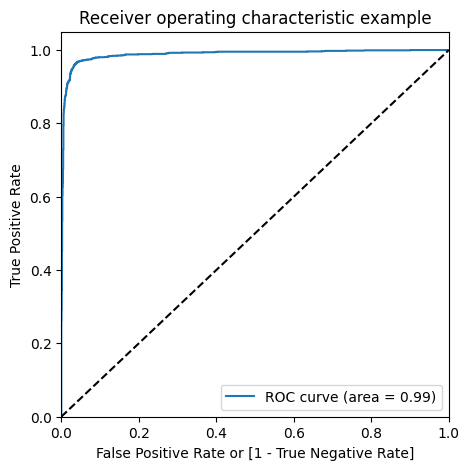

In [125]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Convert_Prob)

## 7.5. Finding the Optimal Threshold

In [126]:
# Creating Columns with Different Probability Cutoff

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
  Y_train_pred_final[i] = Y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)

Y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011249,5066,0,1,0,0,0,0,0,0,0,0,0
1,0,0.016844,7578,0,1,0,0,0,0,0,0,0,0,0
2,0,0.017375,7921,0,1,0,0,0,0,0,0,0,0,0
3,1,0.987064,9155,1,1,1,1,1,1,1,1,1,1,1
4,0,0.001138,542,0,1,0,0,0,0,0,0,0,0,0


In [127]:
# Calculate accuracy, sensitivity and specificity for various probability cut-offs

cutoff_df = pd.DataFrame(columns = ["prob", "accuracy", "sensi", "speci"])

from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.3, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
  cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i])
  total1 = sum(sum(cm1))
  accuracy = (cm1[0,0]+cm1[1,1])/total1

  speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.420107  1.000000  0.000000
0.1   0.1  0.937283  0.979745  0.906522
0.3   0.3  0.962181  0.966992  0.958696
0.4   0.4  0.962811  0.962491  0.963043
0.5   0.5  0.961551  0.949737  0.970109
0.6   0.6  0.961235  0.943736  0.973913
0.7   0.7  0.959660  0.937734  0.975543
0.8   0.8  0.955878  0.925731  0.977717
0.9   0.9  0.941696  0.876969  0.988587


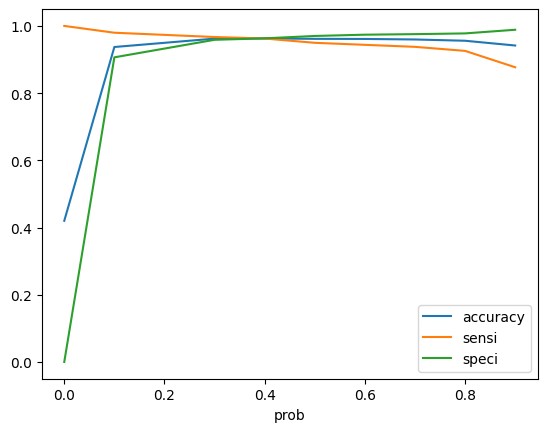

In [128]:
# Plot the accuracy, sensitivity and specificity for various probability probabilities

cutoff_df.plot.line(x = "prob", y = ["accuracy", "sensi", "speci"])
plt.show()

From the above plot, we can understand that the 0.3 is the optimum cu-off point

In [129]:
# From the above plot 0.33 is the optimum cut-off point

Y_train_pred_final['final_predicted'] = Y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

Y_train_pred_final.head()

,Converted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.011249,5066,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.016844,7578,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.017375,7921,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.987064,9155,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.001138,542,0,1,0,0,0,0,0,0,0,0,0,0


## 7.6. Calculating the final Accuracy, Precision and Recall

In [130]:
# Confusion Matrix

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

confusion

array([[1764,   76],
       [  44, 1289]])

In [131]:
logistic_reg_metrics(confusion)

Accuracy = 0.9621809013551844
Sensitivity = 0.9669917479369843
Specificity = 0.9586956521739131

False Positive Rate = 0.041304347826086954
False Negative Rate = 0.033008252063015754
Positive Predictive Value (Precision (PRE)) = 0.9443223443223443
Negative Predictive Value (recall (REC)) = 0.9669917479369843
F1-Score = 0.955522609340252


In [132]:
# Accuracy

metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.9621809013551844

In [133]:
# Precision

metrics.precision_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.9443223443223443

In [134]:
# Recall

metrics.recall_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.9669917479369843

## 7.7. Precision - Recall Tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Convert_Prob)

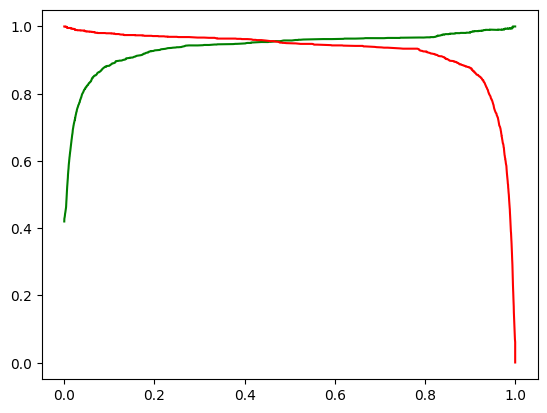

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 8. Making the Prediction

## 8.1. Scalling the X_test Data

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test = X_test[col]

X_test.head()

,Total Time Spent on Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Country_Germany,Country_Hong Kong,How did you hear about X Education_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
8605,-0.857695,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
760,0.909252,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1342,-1.110632,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5626,-0.709546,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1185,0.002291,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 8.2. Fitting the Test Data into a Model

In [140]:
# Adding a Constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Total Time Spent on Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Country_Germany,Country_Hong Kong,How did you hear about X Education_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
8605,1.0,-0.857695,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
760,1.0,0.909252,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1342,1.0,-1.110632,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5626,1.0,-0.709546,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1185,1.0,0.002291,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [141]:
# Predicting test data

Y_test_pred = res.predict(X_test_sm)

In [142]:
Y_test_pred[:10]

8605    0.007152
760     0.987573
1342    0.005592
5626    0.012497
1185    0.016448
3988    0.007460
4949    0.108208
7479    0.005737
4651    0.666602
5420    0.000843
dtype: float64

In [143]:
# Converting Y_test_pred to dataframe, which is an array

Y_pred_1 = pd.DataFrame(Y_test_pred)

In [144]:
Y_pred_1.head()

,0
8605,0.007152
760,0.987573
1342,0.005592
5626,0.012497
1185,0.016448


In [145]:
# Converting Y_test to dataframe

Y_test_df = pd.DataFrame(Y_test)

In [146]:
Y_test_df.head()

,Converted
8605,0
760,1
1342,1
5626,0
1185,0


In [147]:
# Putting LeadID to index

Y_test_df["LeadID"] = Y_test_df.index

Y_test_df.head()

,Converted,LeadID
8605,0,8605
760,1,760
1342,1,1342
5626,0,5626
1185,0,1185


In [148]:
# Removing Index from Y_pred_1 and Y_test_df to append them side by side

Y_pred_1.reset_index(drop = True, inplace = True)
Y_test_df.reset_index(drop = True, inplace = True)

In [149]:
# Apending Y_pred_1 and Y_test_df

Y_pred_final = pd.concat([Y_test_df, Y_pred_1], axis = 1)

In [150]:
Y_pred_final.head()

,Converted,LeadID,0
0,0,8605,0.007152
1,1,760,0.987573
2,1,1342,0.005592
3,0,5626,0.012497
4,0,1185,0.016448


In [151]:
# Renaming the column O to Churn_Prob

Y_pred_final = Y_pred_final.rename(columns = {0: "Convert_Prob"})

In [152]:
# Rearranging the columns

Y_pred_final = Y_pred_final.reindex(['LeadID','Converted','Convert_Prob'], axis=1)

In [153]:
Y_pred_final.head()

,LeadID,Converted,Convert_Prob
0,8605,0,0.007152
1,760,1,0.987573
2,1342,1,0.005592
3,5626,0,0.012497
4,1185,0,0.016448


In [154]:
Y_pred_final['final_predicted'] = Y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [155]:
Y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted
0,8605,0,0.007152,0
1,760,1,0.987573,1
2,1342,1,0.005592,0
3,5626,0,0.012497,0
4,1185,0,0.016448,0


In [156]:
confusion = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted)

confusion

array([[728,  49],
       [ 25, 559]])

**Confusion Matrix**

Actual\Predictd | No (No Churn) | Yes (Churn)
----------------|---------------|------------
No (No Churn)   |    728        |    49
Yes (Churn)     |    25         |    559

## 8.3. Checking the Accuracy, Precision and Recall of the Prediction

In [157]:
logistic_reg_metrics(confusion)

Accuracy = 0.9456282145481264
Sensitivity = 0.9571917808219178
Specificity = 0.9369369369369369

False Positive Rate = 0.06306306306306306
False Negative Rate = 0.04280821917808219
Positive Predictive Value (Precision (PRE)) = 0.9194078947368421
Negative Predictive Value (recall (REC)) = 0.9571917808219178
F1-Score = 0.9379194630872483


In [158]:
# Accuracy

metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.9456282145481264

In [159]:
# Precision

metrics.precision_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.9194078947368421

In [160]:
# Recall

metrics.recall_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.9571917808219178

## 8.4. Adding Lead Score to Features of Test Data (X_test)

In [161]:
Y_pred_final["Lead_Score"] = Y_pred_final["Convert_Prob"].map(lambda x: round(x * 100))

In [162]:
Y_pred_final.head(20)

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,8605,0,0.007152,0,1
1,760,1,0.987573,1,99
2,1342,1,0.005592,0,1
3,5626,0,0.012497,0,1
4,1185,0,0.016448,0,2
5,3988,0,0.007460,0,1
6,4949,1,0.108208,0,11
7,7479,0,0.005737,0,1
8,4651,1,0.666602,1,67
9,5420,0,0.000843,0,0


- A higher lead score would mean that it is a hot lead
- A lower lead score would mean that it is a cold lead and will mostly not get convert

# 9. Looking at the Important Features and their Coefficients

In [163]:
parameters=res.params.sort_values(ascending=False)
parameters

Tags_Closed by Horizzon                     5.951381
Tags_Will revert after reading the email    4.258581
Country_Hong Kong                           3.633706
Country_Germany                             2.752979
Tags_Busy                                   1.285674
How did you hear about X Education_Other    1.030296
Total Time Spent on Website                 0.979341
Last Activity_SMS Sent                      0.854678
Lead Profile_Potential Lead                 0.820431
const                                      -1.628366
Last Activity_Email Bounced                -2.261626
Tags_Interested  in full time MBA          -2.276199
Lead Profile_Student of SomeSchool         -2.288052
Tags_Interested in other courses           -2.400017
Tags_Ringing                               -2.464825
Tags_invalid number                        -2.720716
Tags_Not doing further education           -2.827482
Tags_switched off                          -2.901144
dtype: float64

# 9. Conclusion

## 9.1. Train Test Data

 - **Train Data:**
  - **Accuracy:** 0.9621809013551844

  - **Sensitivity:** 0.9669917479369843

  - **Specificity:** 0.9586956521739131

  - **Precision:** 0.9443223443223443

  - **Recall:** 0.9669917479369843

  - **F1-Score:** 0.955522609340252

- **Test Data:**

  - **Accuracy:** 0.9456282145481264

  - **Sensitivity:** 0.9571917808219178

  - **Specificity:** 0.9369369369369369

  - **Precision:** 0.9194078947368421

  - **Recall:** 0.9571917808219178

  - **F1-Score:** 0.9379194630872483

**Inference:** The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
  - The model achieved a **sensitivity of 96.22%** in the train set and **94.56% in the test set**, using a **cut-off value of 0.3**
  - Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
  - The CEO of X Education had set a target sensitivity of around 80%
  - The model also achieved an **accuracy of 94.56%** and **Recall of 95.72%**, which is in line with the study's objectives

- **Model Parameters:**

  - **Top 3 positively contributing features that predicting hot leads in the model are:**
    1. Tags_Closed by Horizzon
    2. Tags_Will revert after reading the email
    3. Country_Hong Kong

  - **Top 3 negatively contributing features that predicting hot leads in the model are:**
    1. Tags_switched off
    2. Tags_Not doing further education
    3. Tags_invalid number

## 9.2. Recomendations:

- **From Exploratory Data Analysis:**
  1. When the lead source is Reference, the conversion rate is high. X Education should focus on focus on References. Providing referral bonus can be benificial.
  2. Working professionals are more likely to convert thann Unemployed peoples and students. Marketing team should make ccampaigns targeting working professionals.
  3. Leads that received SMS have the most lead conversion rate. X Education should focus on reaching out to the leads via messaging services.

- **From Logistic Regression Model:**
  1. Other than India, focus on Hong Kong, Germany for potential leads.
  2. People who make more time on the website are more likely to ne a 'Hot Lead'. Making the websitemore engaging or bug free is important.
  3. People who are interested in MBA or other courses or not intersted in higher education, will most likely won't be converted.
  4. School students have less provability to take any course from X Education. MMay be all the courses are designed for graduates or college students or working professionals.